https://qiita.com/kazuya_minakuchi/items/682731be50e84e7efa45 の図を作ったコード

※ほとんど「機械学習のエッセンス: https://www.amazon.co.jp/gp/product/4797393963/ref=ppx_yo_dt_b_search_asin_title 」の写経

In [24]:
#必要なライブラリインポート
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [25]:
class PCA:
    def __init__(self, n_components, tol=0.0, random_seed=0):
        self.n_components = n_components
        self.tol = tol
        self.random_state_ = np.random.RandomState(random_seed)
    
    def fit(self, X):
        v0 = self.random_state_.randn(min(X.shape))
        xbar = X.mean(axis=0)
        Y = X - xbar
        S = np.dot(Y.T, Y)
        U, Sigma, VT = svds(S, k=self.n_components,
                            tol=self.tol, v0=v0)
        self.VT_ = VT[::-1, :]
    
    def transform(self, X):
        return self.VT_.dot(X.T).T

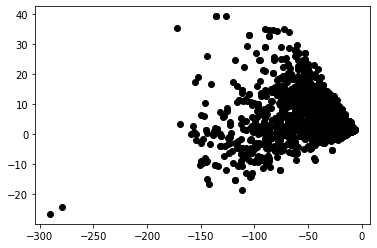

In [26]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

Xy = pd.read_csv(url, sep=';')
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

model = PCA(n_components=2)
model.fit(X)

Y = model.transform(X)

plt.scatter(Y[:, 0], Y[:, 1], color="k")
plt.show()

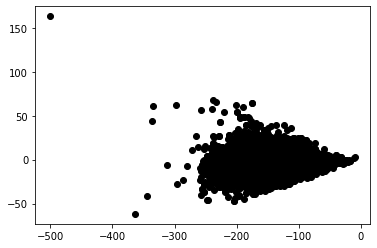

In [27]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

Xy = pd.read_csv(url, sep=';')
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

model = PCA(n_components=2)
model.fit(X)

Y = model.transform(X)

plt.scatter(Y[:, 0], Y[:, 1], color="k")
plt.show()